In [91]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

In [92]:
df = pd.read_csv(r"H:\Programming\Dataset\Machine Learning\Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


### Data Visualization

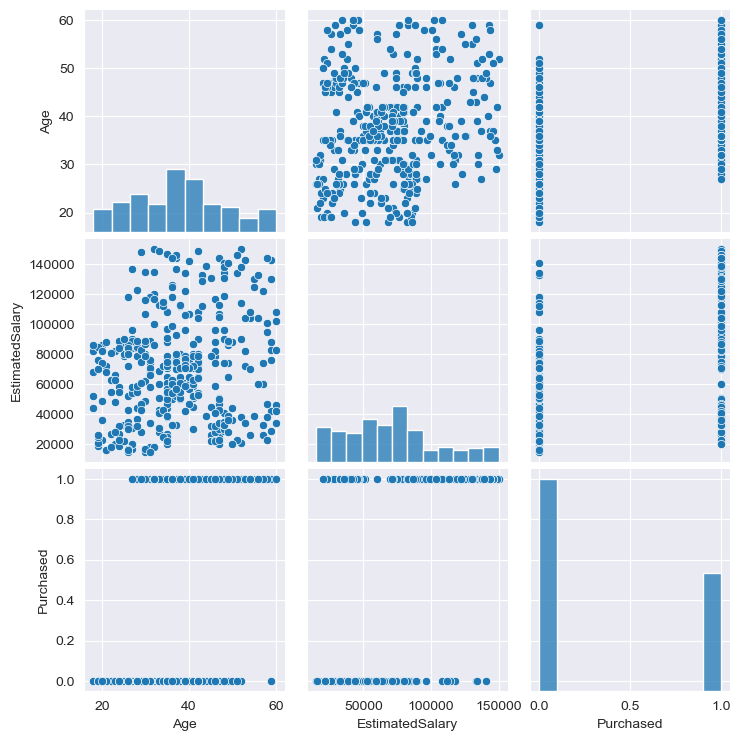

In [94]:
sns.pairplot(df)
plt.show()

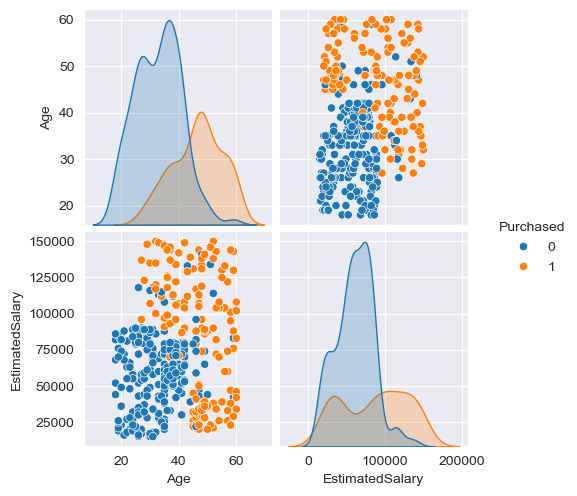

In [95]:
sns.pairplot(df, hue='Purchased')
plt.show()

In [96]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

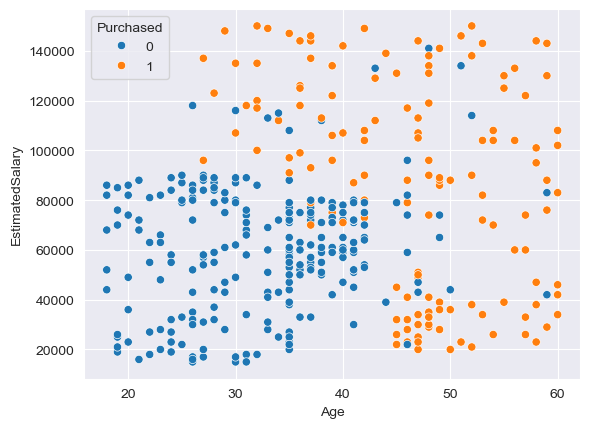

In [97]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=df, hue='Purchased')
plt.show()

# Modeling

### StandardScaler

In [98]:
x = df.iloc[:, :-1]
y = df["Purchased"]

In [99]:
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x), columns=x.columns)
x.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

## KNN Model

In [101]:
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### SCORE

In [102]:
knn.score(x_test, y_test)

0.925

## Best Value for KKN

In [103]:
# STORE RESULTS
results = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, p=1)  # p=1 → Manhattan_distance
    knn.fit(x_train, y_train)

    train_acc = round(knn.score(x_train, y_train) * 100, 2)
    test_acc = round(knn.score(x_test, y_test) * 100, 2)

    results.append([k, train_acc, test_acc])

# CREATE DATAFRAME
result_df = pd.DataFrame(
    results,
    columns=["K_Neighbors", "Train_Accuracy", "Test_Accuracy"]
)

# ACCURACY DIFFERENCE
result_df["Accuracy_Diff_Neg"] = (
    result_df["Train_Accuracy"] - result_df["Test_Accuracy"]
)

# Absolute difference (generalization gap)
result_df["Accuracy_Diff_Abs"] = result_df["Accuracy_Diff_Neg"].abs()

# SORT RESULTS (BEST GENERALIZATION FIRST)
result_df_sorted = (
    result_df
    .sort_values(by="Accuracy_Diff_Abs", ascending=True)
    .reset_index(drop=True)
)

# SHOW ONLY NEGATIVE DIFFERENCE VALUES
result_df_sorted["Accuracy_Diff_Neg"] = (
    result_df_sorted["Accuracy_Diff_Neg"]
    .apply(lambda x: f"{x:.2f}" if x < 0 else "")
)

# REORDER COLUMNS
result_df_sorted = result_df_sorted[
    [
        "K_Neighbors",
        "Train_Accuracy",
        "Test_Accuracy",
        "Accuracy_Diff_Abs",
        "Accuracy_Diff_Neg"
    ]
]

result_df_sorted


,K_Neighbors,Train_Accuracy,Test_Accuracy,Accuracy_Diff_Abs,Accuracy_Diff_Neg
0,3,91.56,91.25,0.31,
1,4,92.19,92.50,0.31,-0.31
2,6,90.94,91.25,0.31,-0.31
3,5,91.25,92.50,1.25,-1.25
4,7,91.25,92.50,1.25,-1.25
5,11,91.25,93.75,2.50,-2.50
6,8,90.00,92.50,2.50,-2.50
7,10,90.94,93.75,2.81,-2.81
8,9,90.94,93.75,2.81,-2.81
9,13,90.62,93.75,3.13,-3.13


In [104]:
# STORE RESULTS
results = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, p=2)  # p=2 → Euclidean distance
    knn.fit(x_train, y_train)

    train_acc = round(knn.score(x_train, y_train) * 100, 2)
    test_acc = round(knn.score(x_test, y_test) * 100, 2)

    results.append([k, train_acc, test_acc])

# CREATE DATAFRAME
result_df = pd.DataFrame(
    results,
    columns=["K_Neighbors", "Train_Accuracy", "Test_Accuracy"]
)

# ACCURACY DIFFERENCE
result_df["Accuracy_Diff_Neg"] = (
    result_df["Train_Accuracy"] - result_df["Test_Accuracy"]
)

# Absolute difference (generalization gap)
result_df["Accuracy_Diff_Abs"] = result_df["Accuracy_Diff_Neg"].abs()

# SORT RESULTS (BEST GENERALIZATION FIRST)
result_df_sorted = (
    result_df
    .sort_values(by="Accuracy_Diff_Abs", ascending=True)
    .reset_index(drop=True)
)

# SHOW ONLY NEGATIVE DIFFERENCE VALUES
result_df_sorted["Accuracy_Diff_Neg"] = (
    result_df_sorted["Accuracy_Diff_Neg"]
    .apply(lambda x: f"{x:.2f}" if x < 0 else "")
)

# REORDER COLUMNS
result_df_sorted = result_df_sorted[
    [
        "K_Neighbors",
        "Train_Accuracy",
        "Test_Accuracy",
        "Accuracy_Diff_Abs",
        "Accuracy_Diff_Neg"
    ]
]

result_df_sorted


,K_Neighbors,Train_Accuracy,Test_Accuracy,Accuracy_Diff_Abs,Accuracy_Diff_Neg
0,4,91.88,92.50,0.62,-0.62
1,6,90.94,90.00,0.94,
2,13,91.56,92.50,0.94,-0.94
3,3,92.50,91.25,1.25,
4,12,91.25,92.50,1.25,-1.25
5,5,90.94,92.50,1.56,-1.56
6,19,90.94,92.50,1.56,-1.56
7,11,90.94,92.50,1.56,-1.56
8,7,91.88,93.75,1.87,-1.87
9,10,90.62,92.50,1.88,-1.88


# FINAL MODEL

In [105]:
knn = KNeighborsClassifier(n_neighbors=3, p=1)
knn.fit(x_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Score

In [106]:
knn.score(x_test, y_test)

0.9125

In [107]:
knn.score(x_train, y_train)

0.915625

## Prediction

In [108]:
# Take last 5 rows
x_last = x[-5:]
y_last = y[-5:]

# Combine features and target
test_pre = pd.concat([x_last, y_last], axis=1)

# Rename columns properly
test_pre.columns = ["Age", "EstimatedSalary", "Result"]

test_pre


,Age,EstimatedSalary,Result
395,0.797057,-0.844019,1
396,1.274623,-1.372587,1
397,1.179110,-1.460681,1
398,-0.158074,-1.078938,0
399,1.083596,-0.990844,1


In [109]:
knn.predict([[0.797057, -0.844019]])  # Wrong Predict

array([0])

In [110]:
knn.predict([[1.274623, -1.372587]])  # Correct Predict

array([1])

In [111]:
knn.predict([[-0.158074, -1.078938]])  # Correct Predict

array([0])

## Separation

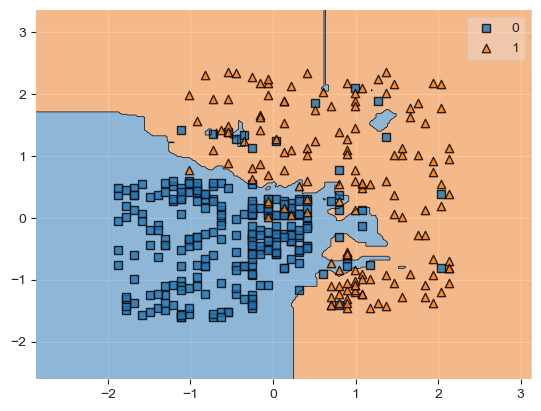

In [114]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=knn)
# plt.savefig("knn.png")
plt.show()